In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df=pd.read_csv("Data/twitter_training.csv" )
df


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [146]:
col=['Id' , 'Topic' , 'label' , 'Tweet']
df=pd.read_csv("Data/twitter_training.csv" ,names=col)
df

,Id,Topic,label,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [147]:
df.columns
df.head(10)

,Id,Topic,label,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [148]:
df.describe()

,Id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [149]:
df.isnull().sum()

Id         0
Topic      0
label      0
Tweet    686
dtype: int64

In [171]:
df.dropna(inplace=True)

In [151]:
df.isnull().sum()

Id       0
Topic    0
label    0
Tweet    0
dtype: int64

In [152]:
(df.shape)

(73996, 4)

In [153]:
df.duplicated().sum()

2340

In [154]:
df.drop_duplicates(inplace=True)


In [155]:
df.duplicated().sum()

0

In [156]:
df.Topic.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

C:\Users\pc\AppData\Local\Temp\ipykernel_3852\1157971068.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y='Topic', data=df, palette='viridis',kind='count', height=7, aspect=2 )


<function matplotlib.pyplot.show(close=None, block=None)>

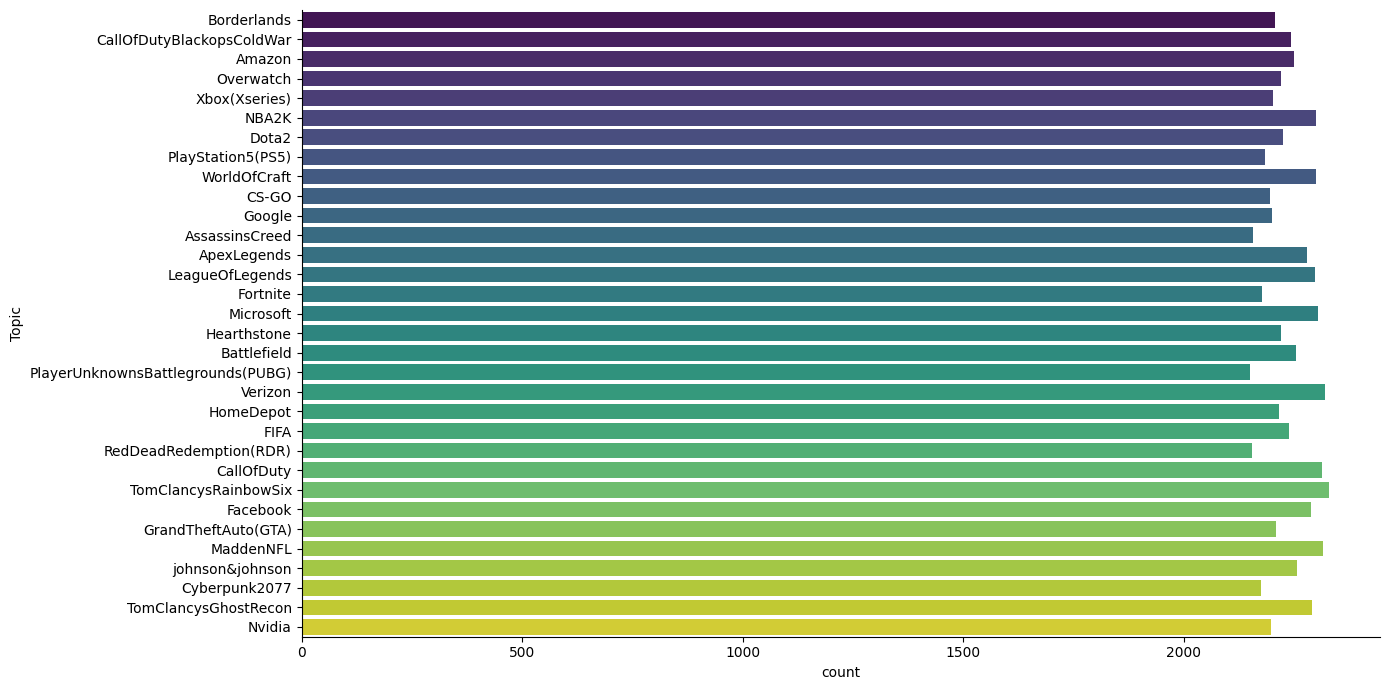

In [157]:
sns.catplot(y='Topic', data=df, palette='viridis',kind='count', height=7, aspect=2 ) 
plt.xlabel("count")
plt.ylabel("Topic")
plt.show

In [158]:
# removes pattern in the input text
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt


In [159]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['Tweet'], "@[/w]*")

In [160]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,Id,Topic,label,Tweet,clean_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [161]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,Id,Topic,label,Tweet,clean_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderlands will murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"coming borders will kill all,"
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"getting borderlands will kill all,"
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"coming borderlands will murder all,"
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"getting borderlands will murder all,"


In [162]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0          [getting, borderlands, will, murder]
1           [coming, borders, will, kill, all,]
2      [getting, borderlands, will, kill, all,]
3     [coming, borderlands, will, murder, all,]
4    [getting, borderlands, will, murder, all,]
Name: clean_tweet, dtype: object

In [170]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0           [get, borderland, will, murder]
1          [come, border, will, kill, all,]
2       [get, borderland, will, kill, all,]
3    [come, borderland, will, murder, all,]
4     [get, borderland, will, murder, all,]
Name: clean_tweet, dtype: object

C:\Users\pc\AppData\Local\Temp\ipykernel_3852\4128063649.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'label',data=df,palette='viridis')


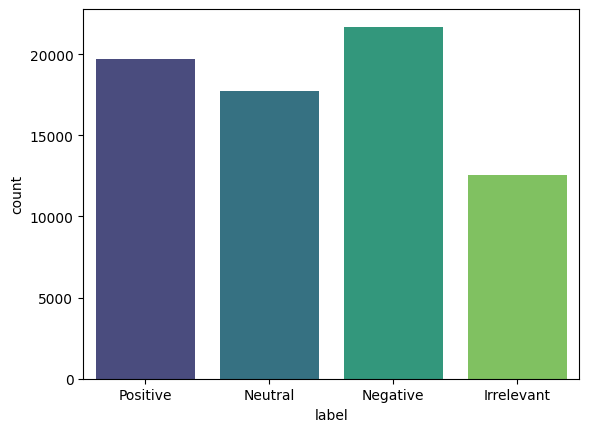

In [172]:
sns.countplot(x = 'label',data=df,palette='viridis')
plt.show()

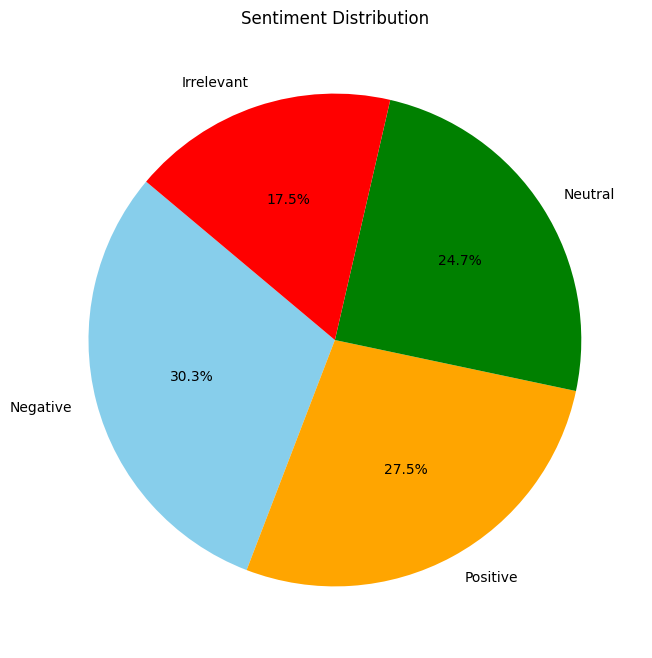

In [165]:
# Calculate the counts for each sentiment
sentiment_counts = df['label'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

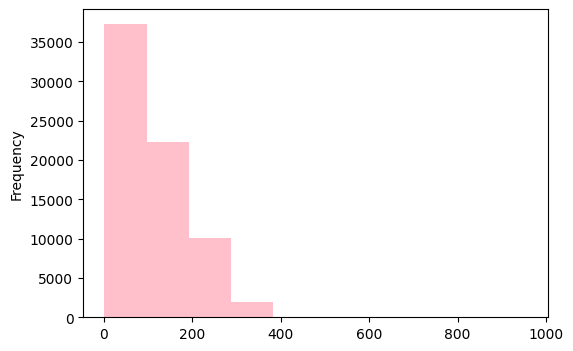

In [ ]:

length_train = df['Tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))

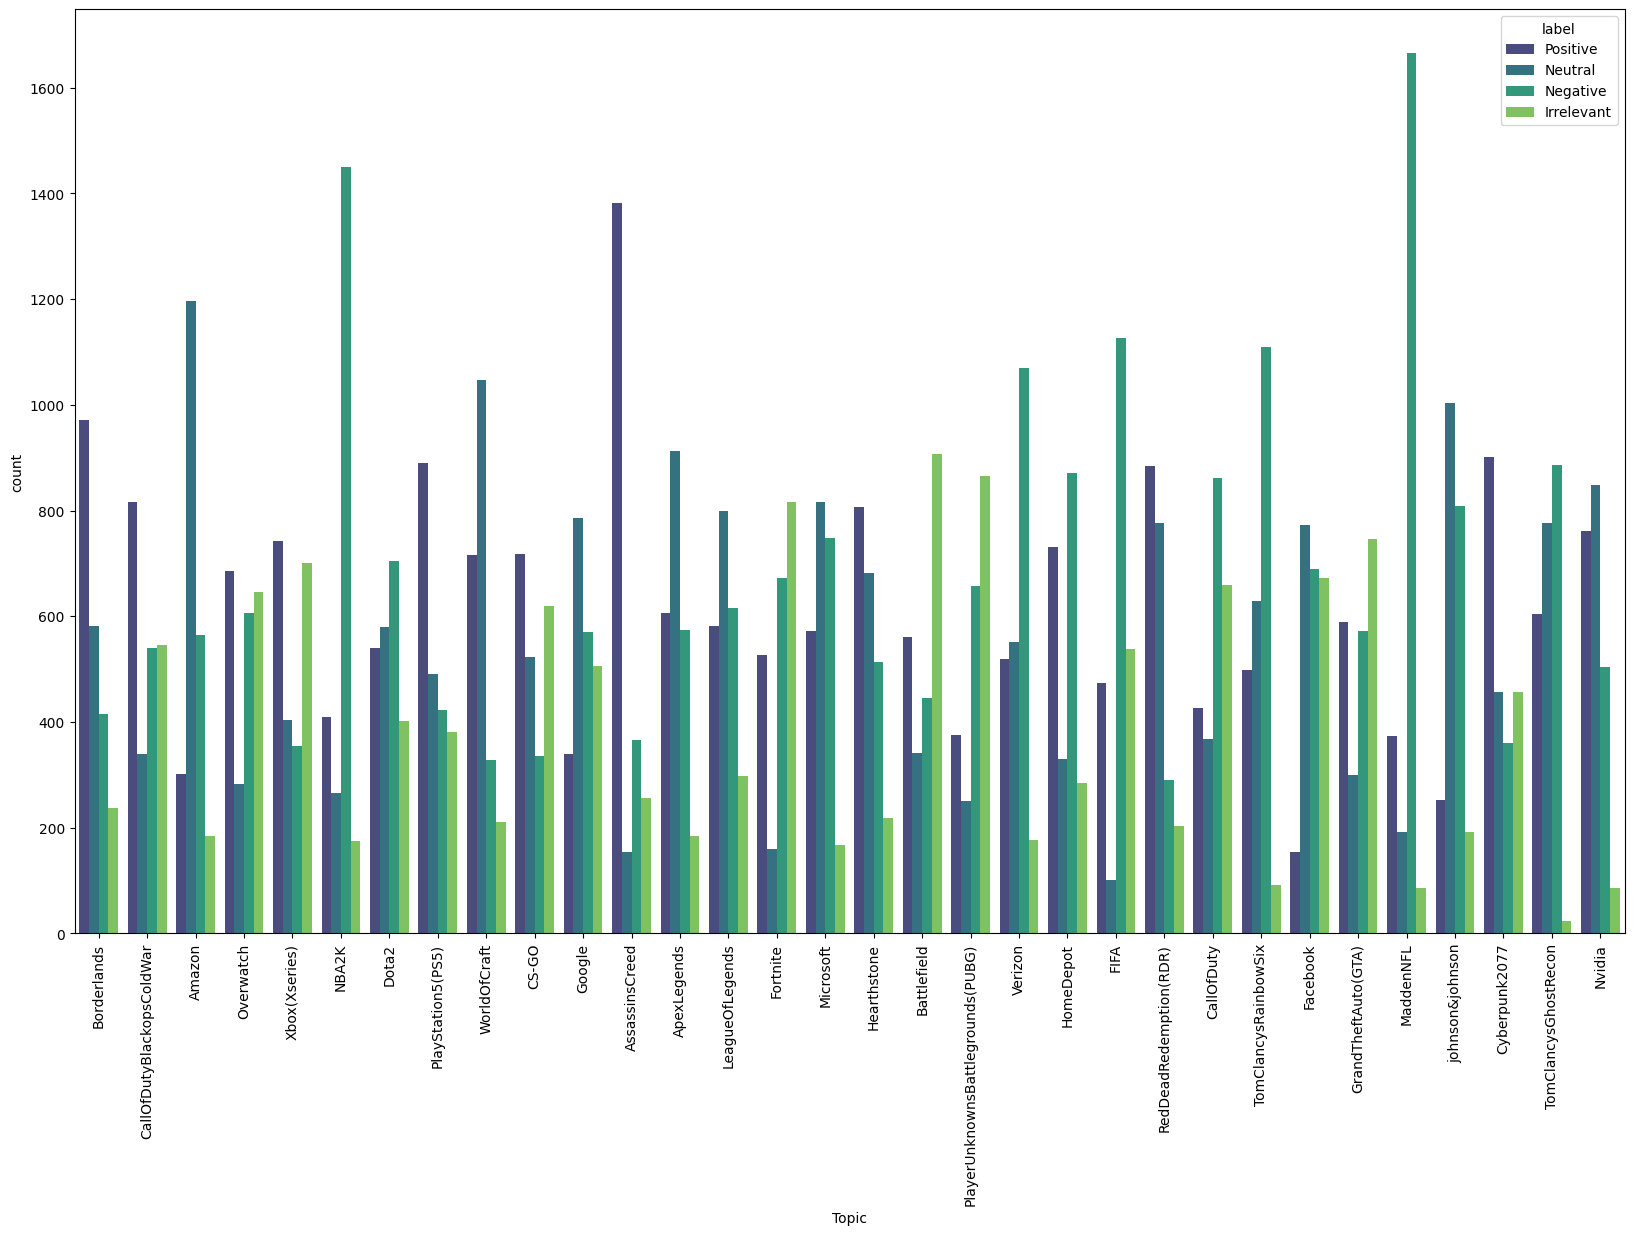

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=df,palette='viridis',hue='label')
plt.xticks(rotation=90)
plt.show()

In [164]:
## Group by Topic and Sentiment
topic_wise_sentiment = df.groupby(["Topic", "label"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = df['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

C:\Users\pc\AppData\Local\Temp\ipykernel_3852\500884018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['label'] == 'Negative'], x='Topic', y='Count', palette='viridis')


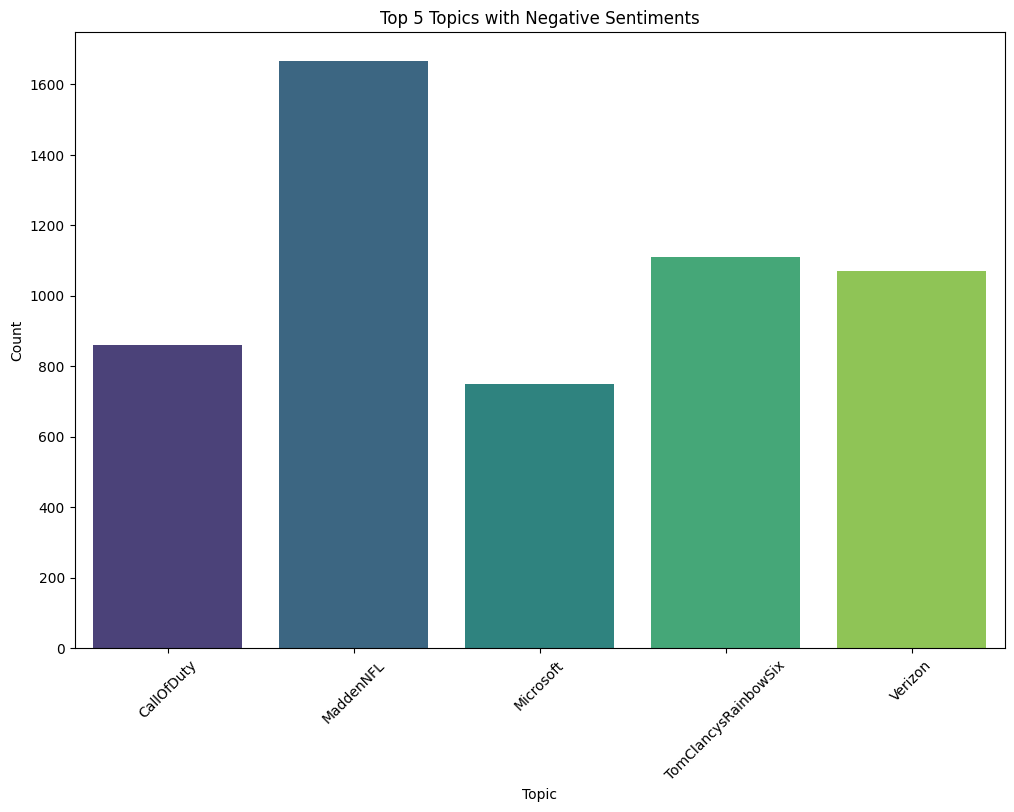

In [166]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['label'] == 'Negative'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_3852\2116921254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['label'] == 'Neutral'], x='Topic', y='Count', palette='Blues')


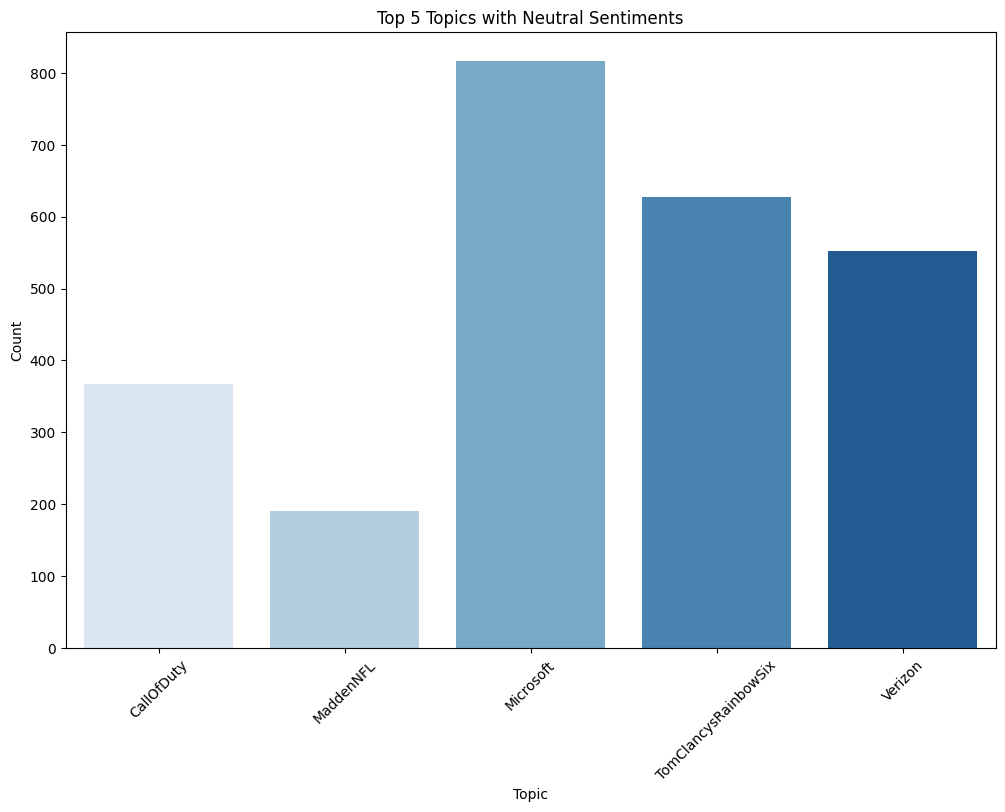

In [167]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['label'] == 'Neutral'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_3852\50032095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['label'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')


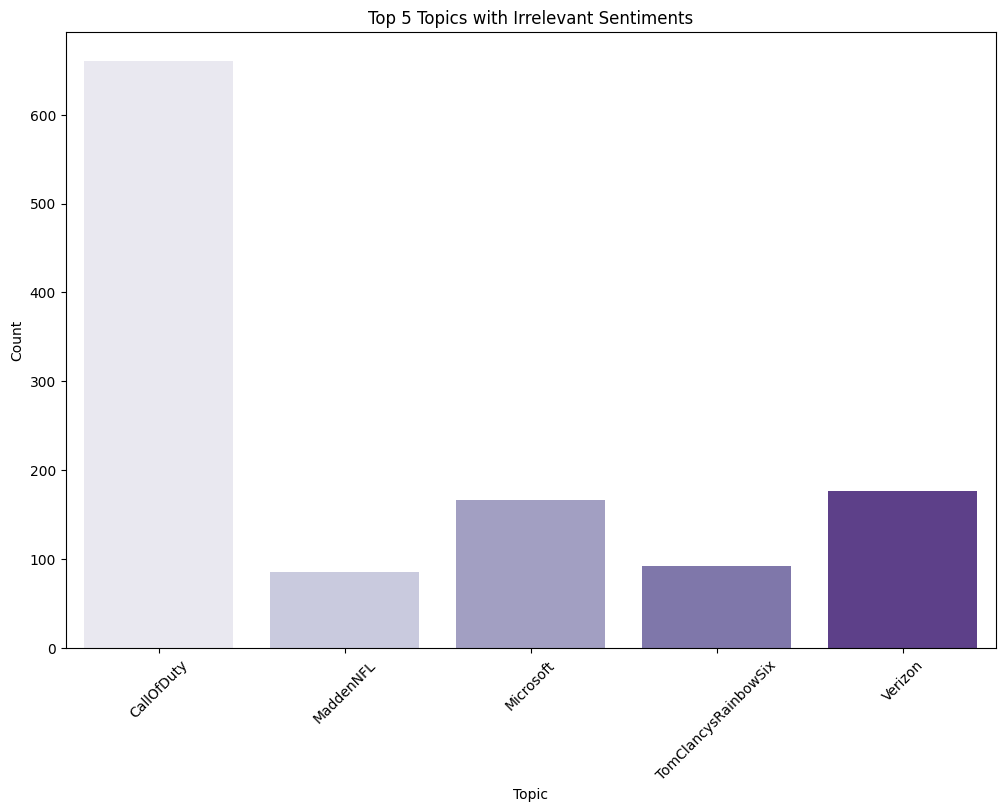

In [168]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['label'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

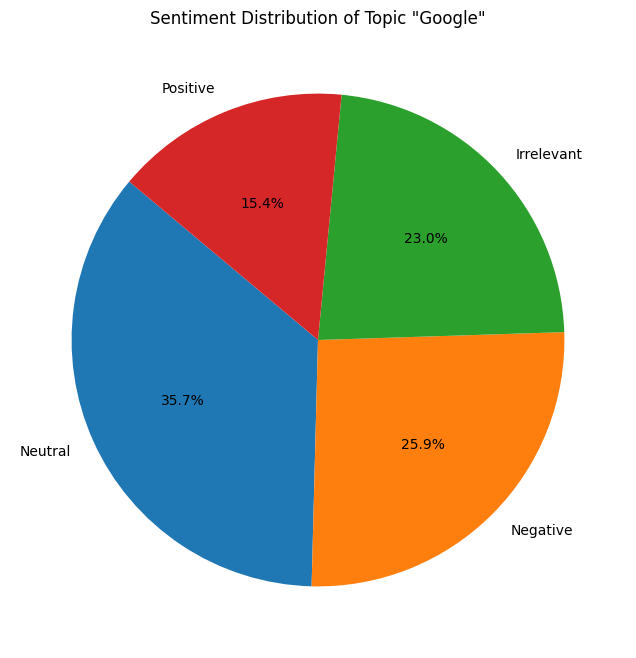

In [ ]:
#Filter the dataset to include only entries related to the topic 'Google'
google_data = df[df['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

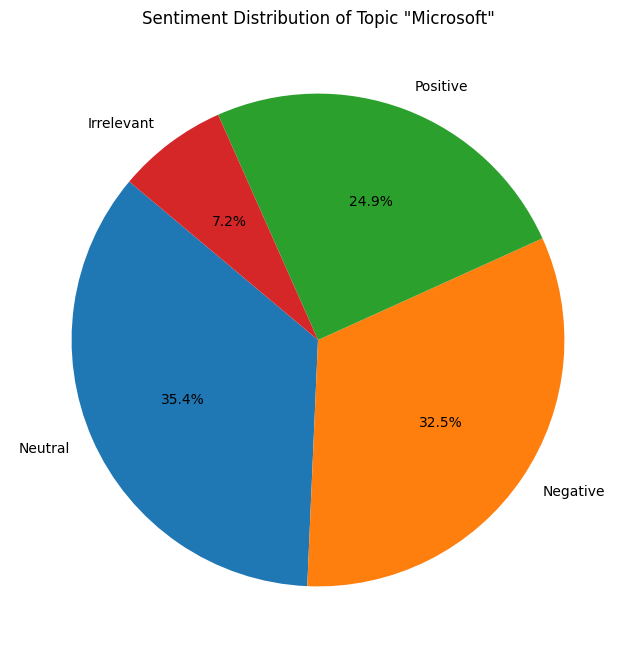

In [ ]:
ms_data = df[df['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [169]:
df['msg_len'] = df['Tweet'].apply(len)

In [ ]:
df

,Id,Topic,label,Tweet,clean_tweet,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,getting borderlands will murder,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"coming borders will kill all,",51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"getting borderlands will kill all,",50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"coming borderlands will murder all,",51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"getting borderlands will murder all,",57
...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,Just realized that Windows partition like year...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,Just realized that window partition years behi...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,Just realized windows partition years behind N...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,Just realized between windows partition like b...,159


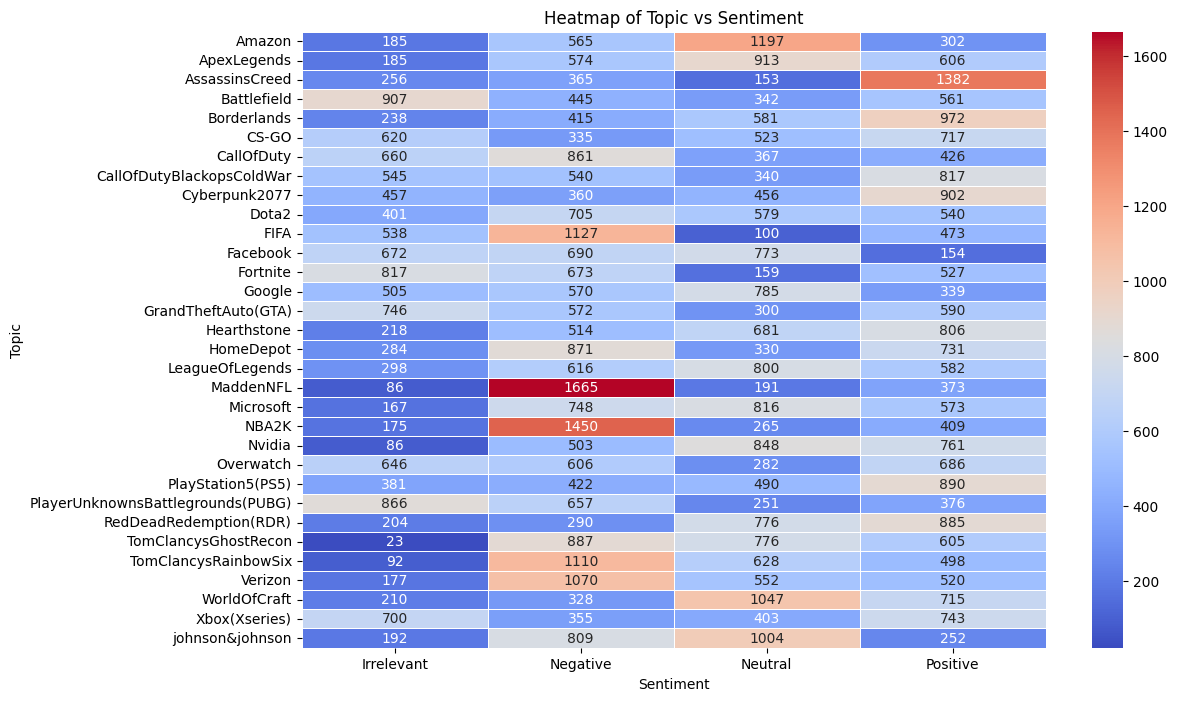

In [ ]:
# Create the crosstab
crosstab = pd.crosstab(index=df['Topic'], columns=df['label'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()